### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix ,accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Tubes_UAS_Pak Wawan/Dataset/dataR2_cancer Coimbra.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [6]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### EDA

In [7]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [8]:
df['Classification'].value_counts().sort_values()

1    52
2    64
Name: Classification, dtype: int64

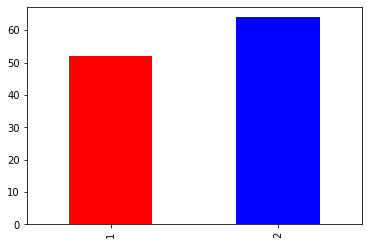

In [9]:
df.Classification.value_counts().sort_values().plot(kind = 'bar',
                                            color=['r','b'])

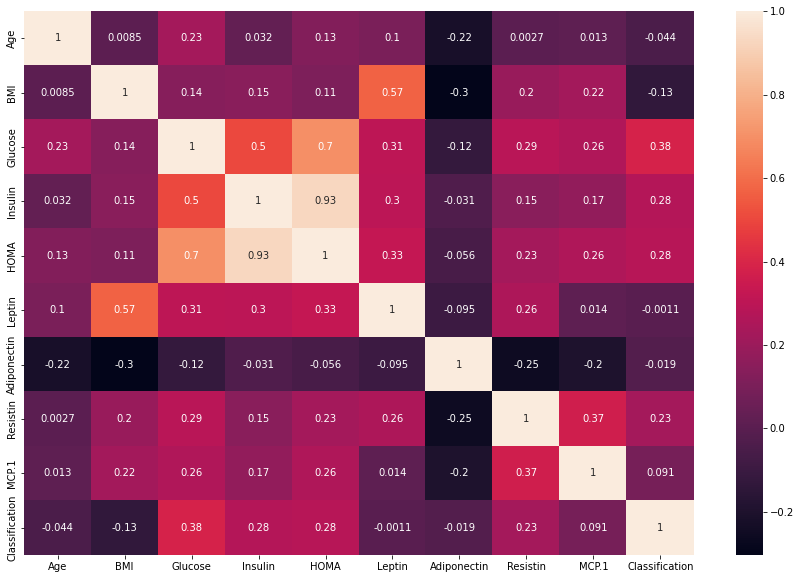

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

### Preprocessing

In [11]:
df2 = df.drop(['Age','BMI','Leptin','Adiponectin','MCP.1'], axis=1)
df2.head(4)

,Glucose,Insulin,HOMA,Resistin,Classification
0,70,2.707,0.467409,7.99585,1
1,92,3.115,0.706897,4.06405,1
2,91,4.498,1.009651,9.27715,1
3,77,3.226,0.612725,12.76600,1


In [12]:
X = df2.drop(['Classification'], axis = 1)
X.head(4)

,Glucose,Insulin,HOMA,Resistin
0,70,2.707,0.467409,7.99585
1,92,3.115,0.706897,4.06405
2,91,4.498,1.009651,9.27715
3,77,3.226,0.612725,12.76600


In [13]:
y = df2[['Classification']]
y.head(4)

,Classification
0,1
1,1
2,1
3,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
print(df.shape)
print(df2.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(116, 10)
(116, 5)
(92, 4) (92, 1)
(24, 4) (24, 1)


### Model

#### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=10)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

[Text(0.5, 0.9, 'X[0] <= 91.0\ngini = 0.491\nsamples = 92\nvalue = [40, 52]'),
 Text(0.22, 0.7, 'X[3] <= 14.227\ngini = 0.405\nsamples = 39\nvalue = [28, 11]'),
 Text(0.08, 0.5, 'X[3] <= 3.281\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.3, 'X[1] <= 30.067\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.08, 0.1, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.16, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36, 0.5, 'X[3] <= 21.106\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.28, 0.3, 'X[0] <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.24, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.32, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.44, 0.3, 'X[1] <= 4.225\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.48, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.78, 0

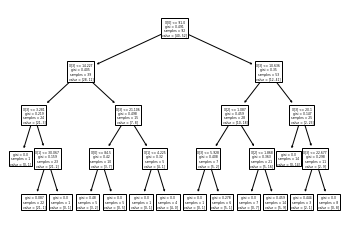

In [17]:
from sklearn import tree

tree.plot_tree(dt)

In [18]:
y_pred_dt = dt.predict(X_test)

In [30]:
decision_tree_acc = accuracy_score(y_test,y_pred_dt)
decision_tree_recall = recall_score(y_test,y_pred_dt, average='macro')
decision_tree_precision = precision_score(y_test,y_pred_dt, average='macro')
decision_tree_f1 = f1_score(y_test,y_pred_dt, average='macro')

print('>> Hasil Evaluasi Model Decission Tree <<')
print('Acc: {}'.format(decision_tree_acc*100))
print('Recall: {}'.format(decision_tree_recall*100))
print('Precision: {}'.format(decision_tree_precision*100))
print('F1-Acore: {}'.format(decision_tree_f1))

>> Hasil Evaluasi Model Decission Tree <<
Acc: 62.5
Recall: 62.5
Precision: 63.33333333333333
F1-Acore: 0.6190476190476191


In [31]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57        12
           2       0.60      0.75      0.67        12

    accuracy                           0.62        24
   macro avg       0.63      0.62      0.62        24
weighted avg       0.63      0.62      0.62        24



#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train.values[:,0])

LogisticRegression()

In [22]:
y_pred_lr = lr.predict(X_test)

In [32]:
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_recall = recall_score(y_test,y_pred_lr, average='macro')
lr_precision = precision_score(y_test,y_pred_lr, average='macro')
lr_f1 = f1_score(y_test,y_pred_lr, average='macro')

print('>> Hasil Evaluasi Model Logistic Regression <<')
print('Acc: {}'.format(lr_acc*100))
print('Recall: {}'.format(lr_recall*100))
print('Precision: {}'.format(lr_precision*100))
print('F1-Acore: {}'.format(lr_f1))

>> Hasil Evaluasi Model Logistic Regression <<
Acc: 66.66666666666666
Recall: 66.66666666666666
Precision: 66.66666666666666
F1-Acore: 0.6666666666666666


In [24]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67        12
           2       0.67      0.67      0.67        12

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.67      0.67      0.67        24



#### Naive Bayes

[Dokumentasi Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train.values[:,0])

GaussianNB()

In [26]:
y_pred_nb = nb.predict(X_test)

In [33]:
nb_acc = accuracy_score(y_test,y_pred_nb)
nb_recall = recall_score(y_test,y_pred_nb, average='macro')
nb_precision = precision_score(y_test,y_pred_nb, average='macro')
nb_f1 = f1_score(y_test,y_pred_nb, average='macro')

print('>> Hasil Evaluasi Model Naive Bayes <<')
print('Acc: {}'.format(nb_acc*100))
print('Recall: {}'.format(nb_recall*100))
print('Precision: {}'.format(nb_precision*100))
print('F1-Acore: {}'.format(nb_f1))

>> Hasil Evaluasi Model Naive Bayes <<
Acc: 83.33333333333334
Recall: 83.33333333333333
Precision: 84.28571428571429
F1-Acore: 0.8321678321678322


In [28]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



### Perbandingan

In [34]:
print('Perbandingan Akurasi Setiap Model')
print('==============================================')
print('Decision Tree           : {:.2f}%'.format(decision_tree_acc * 100))
print('Logistic Regression     : {:.2f}%'.format(lr_acc * 100))
print('Naive Bayes             : {:.2f}%'.format(nb_acc * 100))

Perbandingan Akurasi Setiap Model
Decision Tree           : 62.50%
Logistic Regression     : 66.67%
Naive Bayes             : 83.33%
